# Eta on Rational Curves

In [1]:
from hypersurface import *
import sympy as sp
from pprint import pprint
import time as t
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
z0, z1, z2, z3, z4= sp.symbols('z0, z1, z2, z3, z4')
Z = [z0,z1,z2,z3,z4]
q = z0**5 + z1**5 + z2**5 + z3**5 + z4**5
Quintic = Hypersurface(Z, q, 100)

In [3]:
k = 2
sections_1, ns_1 = Quintic.get_sections(k)

In [4]:
J = []
for z in Z:
    J.append([diff(s,z) for s in sections_1])
J = np.array(J)

In [5]:
J

array([[2*z0, z1, z2, z3, z4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, z0, 0, 0, 0, 2*z1, z2, z3, z4, 0, 0, 0, 0, 0, 0],
       [0, 0, z0, 0, 0, 0, z1, 0, 0, 2*z2, z3, z4, 0, 0, 0],
       [0, 0, 0, z0, 0, 0, 0, z1, 0, 0, z2, 0, 2*z3, z4, 0],
       [0, 0, 0, 0, z0, 0, 0, 0, z1, 0, 0, z2, 0, z3, 2*z4]], dtype=object)

In [6]:
restriction = Quintic.patches[0].patches[0].get_restriction()

In [7]:
restriction

Matrix([
[-z2**4/z1**4, -z3**4/z1**4, -z4**4/z1**4],
[           1,            0,            0],
[           0,            1,            0],
[           0,            0,            1]])

In [8]:
Quintic.list_patches()

Number of Patches: 5
Points in patch 1 : 78
Points in patch 2 : 78
Points in patch 3 : 119
Points in patch 4 : 105
Points in patch 5 : 120


In [9]:
H = np.identity(ns_1)

In [11]:
theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
ts = []
for j in phi:
    for i in theta:
        T = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j))
        if mp.fabs(T)>=1:
            ts.append(1/T)
        else:
            ts.append(T)

In [12]:
FS_Vol_Form_Q = []
start_time = t.time()
sec1 = sp.lambdify(Z,sections_1)
rest1 = sp.lambdify(Z,restriction)
J1 = J[1:]
#J1[0] = np.zeros(ns_1)
js1 = sp.lambdify(Z,J1)
for tt in ts:
    zz = [1,-1,tt,0,-tt]
    zz_bar = [conj(z) for z in zz]
    s = np.array(sec1(*zz)).reshape(1,-1)
    s_dag = np.array(sec1(*zz_bar)).reshape(-1,1)
    j = np.array(js1(*zz))
    j_dag = np.array(js1(*zz_bar)).T
    alpha = np.matmul(s,np.matmul(H,s_dag))
    A = np.matmul(j,np.matmul(H,j_dag))
    B = np.matmul(j,np.matmul(H,np.matmul(s_dag,np.matmul(s,np.matmul(H,j_dag)))))
    G = A/alpha - (B/alpha**2)
    R = np.array(rest1(*zz))
    R_dag = np.array(rest1(*zz_bar)).T
    V = np.matmul(R_dag,np.matmul(G,R))
    V = np.matrix(V,dtype=complex)
    FS_Vol_Form_Q.append(np.linalg.det(V))
print("Time: ",(t.time()-start_time))

Time:  19.929322004318237


In [13]:
OO_Bar = Quintic.get_omega_omegabar()

In [14]:
oob = sp.lambdify(Z,OO_Bar[0][0])

In [15]:
oo_bar = [oob(*[1,-1,tt,0,-tt]) for tt in ts]

In [16]:
eta_1 = np.divide(np.array(FS_Vol_Form_Q),np.array(oo_bar))

In [17]:
R = [eta_1[i*40:(i+1)*40] for i in range(40)]
R = np.asarray(R,dtype=float)

/Users/nannu/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


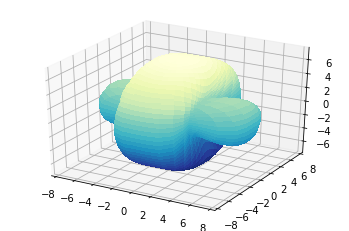

In [18]:
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)

plt.show()

In [18]:
Quintic.patches[0].patches[0].omega_omegabar

1/(25*z1**4*conjugate(z1)**4)

In [37]:
R

array([[ 9.65453547e-20,  3.04460111e+00,  2.81519124e+00, ...,
         2.81592329e+00,  3.04504605e+00, -2.21102924e-20],
       [ 0.00000000e+00,  3.04672663e+00,  2.82287097e+00, ...,
         2.82358567e+00,  3.04703279e+00, -3.76610137e-16],
       [ 0.00000000e+00,  3.05270936e+00,  2.84518964e+00, ...,
         2.84585341e+00,  3.05303499e+00, -3.00000509e-16],
       ...,
       [-5.55020729e-17,  3.05263131e+00,  2.84515345e+00, ...,
         2.84581735e+00,  3.05288052e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.04671385e+00,  2.82285208e+00, ...,
         2.82356682e+00,  3.04705964e+00, -4.20054009e-16],
       [-4.71663837e-20,  3.04460111e+00,  2.81519124e+00, ...,
         2.81592329e+00,  3.04504605e+00, -1.35840388e-19]])

In [48]:
zz = [1,-1,complex(0.4,0.3),0,-complex(0.4,0.3)]

In [49]:
ts[0]

mpc(real='0.00010000000033333334', imag='10000.000016666665')

In [50]:
zz_bar = [conj(z) for z in zz]
s = np.array(sec1(*zz)).reshape(1,-1)
s_dag = np.array(sec1(*zz_bar)).reshape(-1,1)
j = np.array(js1(*zz))
j_dag = np.array(js1(*zz_bar)).T
alpha = np.matmul(s,np.matmul(H,s_dag))
A = np.matmul(j,np.matmul(H,j_dag))
B = np.matmul(j,np.matmul(H,np.matmul(s_dag,np.matmul(s,np.matmul(H,j_dag)))))
G = (A/alpha) - (B/(alpha**2))
R = np.array(rest1(*zz))
R_dag = np.array(rest1(*zz_bar)).T
V = np.matmul(R_dag,np.matmul(G,R))
V = np.matrix(V,dtype=complex)

In [51]:
V

matrix([[0.3644575-8.67361738e-19j, 0.       +0.00000000e+00j,
         0.0409375-9.36000000e-03j],
        [0.       +0.00000000e+00j, 0.4      +0.00000000e+00j,
         0.       +0.00000000e+00j],
        [0.0409375+9.36000000e-03j, 0.       +0.00000000e+00j,
         0.3574175+0.00000000e+00j]])

In [56]:
np.linalg.det(V)

(0.05140000000000002-8.714910795546774e-20j)

In [52]:
alpha

array([[mpc(real='2.5', imag='0.0')]], dtype=object)

In [53]:
R

array([[0.0527-0.0336j, 0.    +0.j    , 0.0527-0.0336j],
       [1.    +0.j    , 0.    +0.j    , 0.    +0.j    ],
       [0.    +0.j    , 1.    +0.j    , 0.    +0.j    ],
       [0.    +0.j    , 0.    +0.j    , 1.    +0.j    ]])

In [54]:
np.linalg.det(V)

(0.05140000000000002-8.714910795546774e-20j)